In [7]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [ ]:
umap_fnames = glob("embeddings/umap_sabdab_embeddings_*.parquet")

In [ ]:
min_dist = 0.5
num_neighbors = 20
fname = f"embeddings/umap_sabdab_embeddings_{num_neighbors}_{min_dist}.parquet"
df = pd.read_parquet(fname)

loop_df = pd.read_parquet("preprocessed_data/sabdab_2025-05-06-paired_loops_with_sequence_id.parquet")
loop_df['loop_id'] = loop_df.apply(lambda x: f"{x['sabdab_id']}_{x['loop_type']}", axis=1)
loop_to_canonical = loop_df.set_index('loop_id')['assigned_cluster'].to_dict()
df['canonical_cluster'] = df['loop_id'].map(loop_to_canonical)
df.loc[df['canonical_cluster'].str.endswith("-*"), 'canonical_cluster'] = df[df['canonical_cluster'].str.endswith("-*")].apply(lambda row: f"Unknown {row['loop_type']}", axis=1)

loop_types = sorted(df['loop_type'].unique().tolist())
loop_lengths = sorted(df['loop_length'].unique().tolist())
canonical_clusters = sorted(df['canonical_cluster'].unique().tolist())
canonical_clusters = [c for c in canonical_clusters if not c.startswith('Unknown')]
canonical_clusters_ordered = sorted(canonical_clusters, key=lambda x: (x.startswith('Unknown'), x.split('-')[0], int(x.split('-')[1]), int(x.split('-')[2].replace("cis", ""))))

cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_gradient", ['#86D4A6', '#86D4C7', '#80C0D3', '#769FD1', '#769FD1', '#6E7DD0', '#866BD0', '#AD7AD3', '#C470D0']
)

colors = [mcolors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, len(loop_types))]
loop_type_color_scheme = dict(zip(loop_types, colors))

colors = [mcolors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, len(loop_lengths))]
loop_length_color_scheme = dict(zip(loop_lengths, colors))

colors = [mcolors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, len(canonical_clusters))]
canonical_cluster_color_scheme = dict(zip(canonical_clusters_ordered, colors))

dark_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_gradient", ["#466B57", "#48716B", "#4C707A", "#425A77", "#3B5069", "#444D7F", "#483A70", "#5A406E", "#6F3F75"]
)
dark_colors = [mcolors.rgb2hex(dark_cmap(i)) for i in np.linspace(0, 1, len(loop_types))]
for i, loop_type in enumerate(loop_types):
    canonical_cluster_color_scheme[f"Unknown {loop_type}"] = dark_colors[i]

canonical_clusters_ordered = [f'Unknown {loop_type}' for loop_type in loop_types] + canonical_clusters_ordered

# Visualise loop type

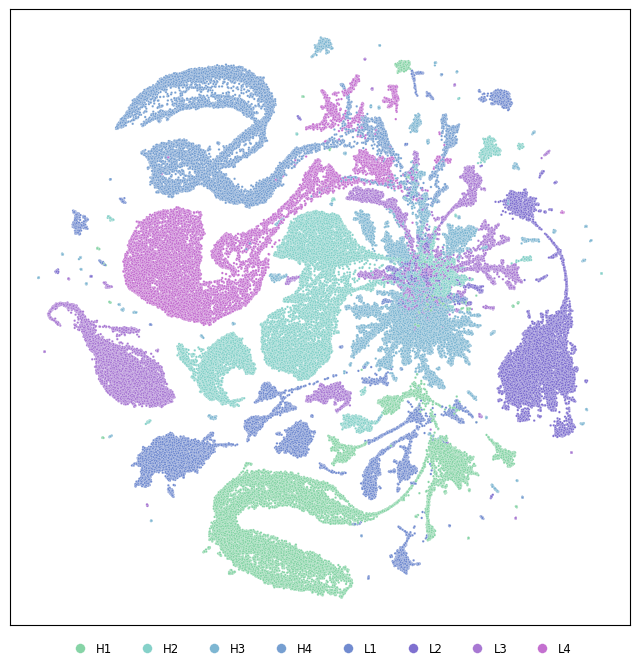

In [67]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(
    data=df,
    x=f'x_{num_neighbors}_{min_dist}',
    y=f'y_{num_neighbors}_{min_dist}',
    hue='loop_type',
    palette=loop_type_color_scheme,
    hue_order=loop_types,
    s=3,
    alpha=1,
)
leg = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.02),# place it just below the axes (y = −0.05)
    frameon=False, 
    ncol=len(loop_types),  # one column per loop length
    borderaxespad=0.0,
    fontsize='small',
    scatterpoints=1,     # one marker per label
    handletextpad=0.4,
    markerscale=4,     # 10× the plotted marker area
)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig(f'umap_{num_neighbors}_{min_dist}_loop_type.png', bbox_inches='tight', dpi=300)
plt.show()

# Visualise loop length

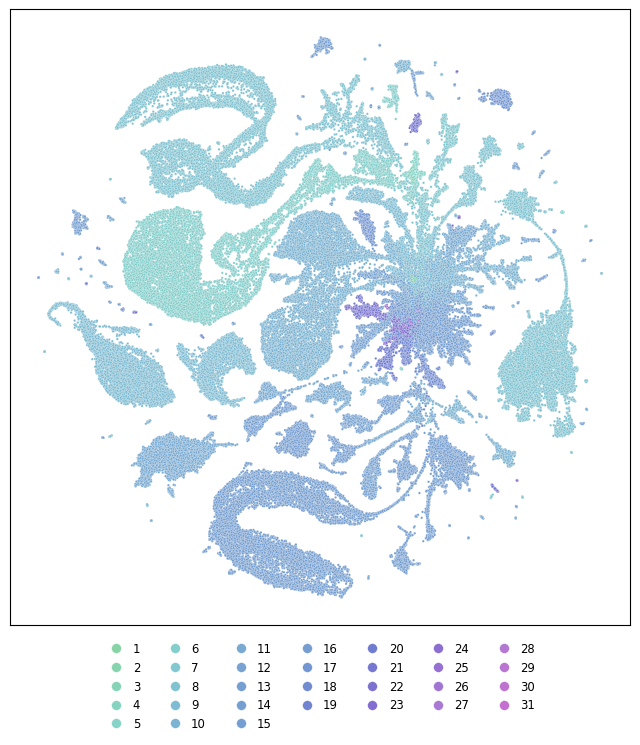

In [69]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(
    data=df,
    x=f'x_{num_neighbors}_{min_dist}',
    y=f'y_{num_neighbors}_{min_dist}',
    hue='loop_length',
    palette=loop_length_color_scheme,
    s=3,
    alpha=1,
)
leg = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.02),# place it just below the axes (y = −0.05)
    frameon=False, 
    ncol=len(loop_lengths)//4,  # one column per loop length
    borderaxespad=0.0,
    fontsize='small',
    scatterpoints=1,     # one marker per label
    handletextpad=0.4,
    markerscale=4,     # 10× the plotted marker area
)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig(f'umap_{num_neighbors}_{min_dist}_loop_length.png', bbox_inches='tight', dpi=300)
plt.show()

# Visualise canonical clusters

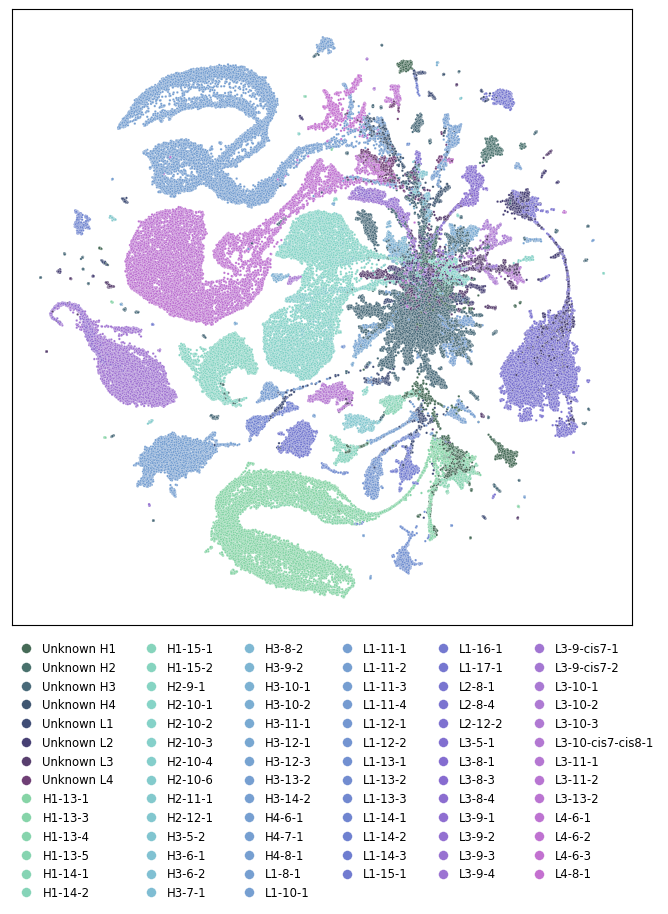

In [68]:
plt.figure(figsize=(8,8))

ax = sns.scatterplot(
    data=df,
    x=f'x_{num_neighbors}_{min_dist}',
    y=f'y_{num_neighbors}_{min_dist}',
    hue='canonical_cluster',
    hue_order=canonical_clusters_ordered,
    palette=canonical_cluster_color_scheme,
    s=3,
    alpha=1,
)
leg = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.52, -0.02),# place it just below the axes (y = −0.05)
    ncol=6,                     # 4 columns  → multiple rows if needed
    frameon=False,              # no border/box
    borderaxespad=0.0,
    fontsize='small',
    scatterpoints=1,     # one marker per label
    handletextpad=0.4,
    markerscale=4,     # 10× the plotted marker area
)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig(f'umap_{num_neighbors}_{min_dist}_canonical_cluster.png', bbox_inches='tight', dpi=300)
plt.show()